Loading of Libraries Required 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Loading Data

In [2]:
data=pd.read_csv(r"D:\ICT Academy\model selection assignments\titanic_dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Preprocessing of Data

In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

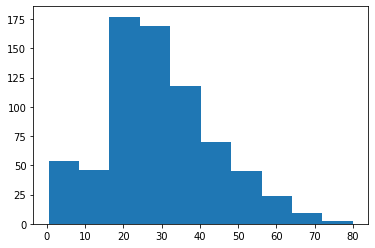

In [4]:
plt.hist(data['Age'])
plt.show()

In [5]:
data['Age']=data['Age'].fillna(data['Age'].median())
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data['Cabin'].nunique()

147

In [7]:
data.shape

(891, 12)

In [8]:
data=data.drop('Cabin',axis=1)
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [9]:
data['Embarked'].nunique()

3

In [10]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [11]:
data['Embarked'].mode()[0]

'S'

In [12]:
data['Embarked'].loc[data['Embarked'].isna()]=data['Embarked'].mode()[0]

C:\Users\chris\AppData\Local\Temp\ipykernel_14404\3379570310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Embarked'].loc[data['Embarked'].isna()]=data['Embarked'].mode()[0]


In [13]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
data=data.drop('Name',axis=1)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


In [15]:
data['Ticket'].nunique()

681

In [16]:
data=data.drop('Ticket',axis=1)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
LE=LabelEncoder()
data['Sex']=LE.fit_transform(data['Sex'])
data['Embarked']=LE.fit_transform(data['Embarked'])

In [19]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int32  
dtypes: float64(2), int32(2), int64(5)
memory usage: 55.8 KB


Spliting of Data to X and Y

In [26]:
X=data.drop('Survived',axis=1)
Y=data['Survived']

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
ss=StandardScaler()
x=ss.fit_transform(X)
x=pd.DataFrame(x,columns=X.columns)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [31]:
from sklearn.metrics import accuracy_score

KNN Method

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
metrics_k=[]
neighbors=range(3,18)
for i in neighbors:
    Classifier=KNeighborsClassifier(n_neighbors=i)
    model=Classifier.fit(X_train,Y_train)
    Y_predict=model.predict(X_test)
    acc=accuracy_score(Y_test,Y_predict)
    metrics_k.append(acc)

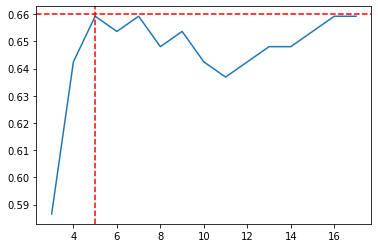

In [34]:
plt.plot(range(3,18),metrics_k)
plt.axhline(0.66,color='red',linestyle='--')
plt.axvline(5,color='red',linestyle='--')
plt.show()

In [35]:
Classifier=KNeighborsClassifier(n_neighbors=5)
model_knn=Classifier.fit(X_train,Y_train)
Y_predict=model_knn.predict(X_test)

In [ ]:
#the model knn = model_knn

SVM Method

In [36]:
from sklearn.svm import SVC

In [37]:
clf_svm=SVC(kernel='linear')
model_svm=clf_svm.fit(X_train,Y_train)
y_predict_svm=model_svm.predict(X_test)

In [ ]:
#the svm model= model_svm

KFOLD

In [38]:
from sklearn.model_selection import KFold

In [39]:
KFold_validator=KFold(10)

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
cvs_knn=cross_val_score(model_knn,x,y,cv=KFold_validator)
print('The cross validation score of KNN method after KFold',np.mean(cvs_knn))


The cross validation score of KNN method after KFold 0.801385767790262


In [42]:
cvs_svm=cross_val_score(model_svm,x,y,cv=KFold_validator)
print('The cross validation score of SVM method after KFold',np.mean(cvs_svm))

The cross validation score of SVM method after KFold 0.786729088639201


Stratified KFold

In [43]:
from sklearn.model_selection import StratifiedKFold

In [44]:
skFold=StratifiedKFold(n_splits=10)

In [45]:
cvs_knn=cross_val_score(model_knn,x,y,cv=skFold)
print('The cross validation score of KNN method after Stratified KFold',np.mean(cvs_knn))

The cross validation score of KNN method after Stratified KFold 0.7980024968789013


In [46]:
cvs_svm=cross_val_score(model_svm,x,y,cv=skFold)
print('The cross validation score of SVM method after Stratified KFold',np.mean(cvs_svm))

The cross validation score of SVM method after Stratified KFold 0.786729088639201
